In [1]:
# Calcula los sitios patrimonio de la humanidad expuestos al cambio climático

# Importamos librerías
import os
import requests
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import geoviews as gv

# Data & Functions

In [2]:
# Parámetros de mapas
gv.extension("matplotlib")
# Coloca la barra de color horizontal y abajo
def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.9*b, w, 0.05*h])
options = { "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar": True,  "colorbar_opts": {"orientation": "horizontal"} } 
options_r = { "colorbar": True, "linewidth": 0.4, "hooks": [hook],
    "colorbar_opts": {"orientation": "horizontal"},
    "cmap": "plasma_r", "ylim":(-62,85), "xlim":(-180,180) }
options_m = { "bgcolor": "lightgray", "fontscale": 2,
    "aspect": 2.25, "ylim":(-62,85), "xlim":(-180,180) }
options_m_2 = { "bgcolor": "#ffffcc", "fontscale": 2,
    "aspect": 2.25, "ylim":(-62,85), "xlim":(-180,180) }

# Parámetros de visualización de tablas
pd.set_option('display.max_colwidth', None)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [3]:
# Datos

# Códigos nacionales
ix  = "ISO_A3"

# Catálogo de datos
path_catalog = "../../Bases_de_datos/Data_catalog.csv"
df_c = pd.read_csv(path_catalog)

# Mapas
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries_mod" )
borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]

# Contorno de países
countries = gv.Path( borders[["geometry"]]
    ).opts( linewidth = 0.4, color = "k" )

# Océano
ocean_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_ocean" )
ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")

# Hidroelectric Plants

In [4]:
# Datos de Centrales Eléctricas
id = "global_power_plant_database"

# Cargamos el archivo
df = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], index_col = "gppd_idnr"
    ).sort_index()
# Creamos un punto con las coordenadas.
df["point"] = gpd.points_from_xy(df["longitude"], df["latitude"])
# Creamos un GeoDataFrame.
df = gpd.GeoDataFrame(df, geometry = "point", crs = 4326)
df["geometry"] = df["point"].buffer(1)
df = df.set_geometry("geometry")

# Guardamos el archivo como shapefile
if not os.path.exists("../results/"):
    os.mkdir(f"../results/{id}/")
    df.set_geometry("point")[ ["name_en", "states_name_en",
        "longitude", "latitude", "point"]
        ].reset_index().to_file(f"../results/{id}/{id}.shp")

/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_20743/3624706550.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_20743/3624706550.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["geometry"] = df["point"].buffer(1)


In [5]:
# Asignamos a cada sitio el valor que le corresponde a su coordenada

# Datos climáticos
c_path = "../share/Climate/"
c_files = os.listdir(c_path)
categories = [ "Drought", "Extreme_temperature",
    "Extreme_rainfall", "Hurricane" ]
cat_var   = []
cat_col_h = []
cat_col_f = []

# Iteramos para cada categoría climática
for cat in categories:
    # Cargamos archivos climáticos históricos y futuros
    with xr.open_dataset(c_path + f"{cat}_1995_2014.nc") as ds_h:
        with xr.open_dataset(c_path + f"{cat}_2040_2059_SSP245.nc") as ds_f:
            vars = list(ds_h.variables)
            vars.remove("lat")
            vars.remove("lon")
            cat_var.append(vars)

            # Agregamos los nombres de las columnas
            cols_h = ( [ f"{vars[0]}, 1995-2014, historical" ]
                + [ f"{cat.replace("_", " ")} {x}, 1995-2014, historical"
                for x in vars[1:] ] )
            cols_f = ( [ f"{vars[0]}, 2040-2059, SSP2-4.5" ]
                + [ f"{cat.replace("_", " ")} {x}, 2040-2059, SSP2-4.5"
                for x in vars[1:] ] )
            df[cols_h] = None
            df[cols_f] = None
            cat_col_h.append(cols_h)
            cat_col_f.append(cols_f)

            # Iteramos para cada coordenada y asignamos los valores
            for row in df.itertuples():
                vals_h = ds_h.sel( lat = row.latitude,
                    lon = row.longitude, method = "nearest" )
                vals_f = ds_f.sel( lat = row.latitude,
                    lon = row.longitude, method = "nearest" )
                # Determinamos si el sitio está afectado o no
                for i in range(0, len(cols_h)):
                    if i == 1:
                        df.loc[row.Index, cols_h[i]] = bool(
                            vals_h[vars[i]].values + 0)
                        df.loc[row.Index, cols_f[i]] = bool(
                            vals_f[vars[i]].values + 0)
                    else:
                        df.loc[row.Index, cols_h[i]] = (
                            vals_h[vars[i]].values + 0 )
                        df.loc[row.Index, cols_f[i]] = (
                            vals_f[vars[i]].values + 0 )

# Guardamos el archivo
df.drop( columns = ["geometry", "point"]
    ).to_csv(f"../share/Indexes/{id}_climate.csv")

In [6]:
# Seleccionamos varibale de capacidad y generación
# y las sumamos por país y tipo de combustible
a = df[ [ "country", "primary_fuel", "capacity_mw", "generation_gwh_2013",
    "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016",
    "generation_gwh_2017", "generation_gwh_2018", "generation_gwh_2019",
    "estimated_generation_gwh_2013", "estimated_generation_gwh_2014",
    "estimated_generation_gwh_2015", "estimated_generation_gwh_2016",
    "estimated_generation_gwh_2017" ]
    ].groupby(["country", "primary_fuel"]).sum()

# Seleccionamos varibale de capacidad y 
# generación y las sumamos por oaís
b = df[ [ "country", "capacity_mw", "generation_gwh_2013",
    "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016",
    "generation_gwh_2017", "generation_gwh_2018", "generation_gwh_2019",
    "estimated_generation_gwh_2013", "estimated_generation_gwh_2014",
    "estimated_generation_gwh_2015", "estimated_generation_gwh_2016",
    "estimated_generation_gwh_2017" ]
    ].groupby(["country"]).sum()

# % de generación correspondiente a hidroeléctrica
c = ( a.loc[ (slice(None), ["Hydro"]),
    [ "capacity_mw", "estimated_generation_gwh_2017"]
    ].reset_index( level = 1, drop = True ) * 100
    / b[ ["capacity_mw", "estimated_generation_gwh_2017"] ]
    )
c = c.where(c.notnull(), 0)

# Agregamos los datos a la tabla original
df = df.reset_index().set_index("country")
df[ ["Total country capacity_mw",
    "Total country estimated_generation_gwh_2017"] ] = (
    b[ ["capacity_mw", "estimated_generation_gwh_2017"] ] )
df[ ["Country % hydro capacity_mw",
    "Country % hydro estimated_generation_gwh_2017"] ] = c
df[ ["% capacity_mw", "% estimated_generation_gwh_2017"] ] = (
    df[ ["capacity_mw", "estimated_generation_gwh_2017"] ]
    / df[ ["Total country capacity_mw", 
    "Total country estimated_generation_gwh_2017"] ].values * 100 )
df[ ["% capacity_mw", "% estimated_generation_gwh_2017"] ] 
df = df.reset_index().set_index("gppd_idnr")

# Datos por central afectada
d = df.loc[ (df["primary_fuel"]=="Hydro")
    & df[ [cat_col_f[0][1], cat_col_f[1][1], cat_col_f[2][1]] ].any(axis = 1)
    & ~df[ [cat_col_h[0][1], cat_col_f[1][1], cat_col_h[2][1]] ].all(axis = 1),
    [ "name", "country", "country_long", "capacity_mw",
    "estimated_generation_gwh_2017",
    cat_col_f[0][1], cat_col_f[1][1], cat_col_f[2][1],
    "Total country capacity_mw", "Total country estimated_generation_gwh_2017",
    "Country % hydro capacity_mw", 
    "Country % hydro estimated_generation_gwh_2017",
    "% capacity_mw", "% estimated_generation_gwh_2017" ]
    ].sort_values( "capacity_mw", ascending = False)

# Guardamos el archivo
d.loc[ d["Country % hydro estimated_generation_gwh_2017"] >= 20,
    list(d.columns[0:7]) + list(d.columns[12:14]) ].to_csv(
        "../results/hidroelectricas_cambio_climatico.csv")

# Visualización de la tabla
d.loc[ d["Country % hydro estimated_generation_gwh_2017"] >= 20,
    list(d.columns[0:7]) + list(d.columns[12:14]) ].head(10).style.format(
    { d.columns[3]: "{:,.0f}", d.columns[4]: "{:,.0f}",
    d.columns[12]: "{:,.1f}", d.columns[13]: "{:,.1f}" } )

,name,country,country_long,capacity_mw,estimated_generation_gwh_2017,"Drought Hotspots, 2040-2059, SSP2-4.5","Extreme temperature Hotspots, 2040-2059, SSP2-4.5",% capacity_mw,% estimated_generation_gwh_2017
gppd_idnr,,,,,,,,,
BRA0002889,Tucuruí,BRA,Brazil,"8,535","24,001",True,False,5.8,4.6
BRA0001161,Itaipu (Parte Brasileira),BRA,Brazil,"7,000","31,364",True,False,4.7,6.0
WRI1022983,Itaipu Binacional Dam (Paraguay part),PRY,Paraguay,"7,000","47,320",True,False,79.9,90.8
BRA0029736,Jirau,BRA,Brazil,"3,750","13,865",True,False,2.5,2.7
BRA0029707,Santo Antônio,BRA,Brazil,"3,568","13,192",True,False,2.4,2.5
BRA0001120,Ilha Solteira,BRA,Brazil,"3,444","10,428",True,False,2.3,2.0
BRA0030354,Belo Monte,BRA,Brazil,"3,327","15,595",True,False,2.3,3.0
BRA0027053,Xingó,BRA,Brazil,"3,162","10,350",False,True,2.1,2.0
WRI1061137,Manuel Piar (Tocoma) Hydroelectric Power Plant Venezuela,VEN,Venezuela,"2,530","11,770",False,True,8.1,11.0


In [7]:
# Datos por país
e = d[ ["country", "% capacity_mw", "% estimated_generation_gwh_2017"]
    ].groupby( "country" ).sum().sort_values(
    "% estimated_generation_gwh_2017",ascending = False)
e.columns = [ "% affected capacity_mw",
    "% affected estimated_generation_gwh_2017" ]
e[ [ "Total country capacity_mw",
    "Total country estimated_generation_gwh_2017"] ] = (
    b[ ["capacity_mw", "estimated_generation_gwh_2017"] ] )
e[ ["Country % hydro capacity_mw",
    "Country % hydro estimated_generation_gwh_2017"] ] = c
e["country_long"] = df[["country", "country_long"]].groupby("country").first()
e = e[ [e.columns[-1]] + list(e.columns[:-1]) ]

# Guardamos el archivo
e[ e["Country % hydro estimated_generation_gwh_2017"] >= 20
    ].to_csv("../results/hidroelectricidad_pais.csv")

# Visualización de la tabla
e[ e["Country % hydro estimated_generation_gwh_2017"] >= 20
    ].style.format( {e.columns[1]: "{:,.1f}", e.columns[2]: "{:,.1f}",
    e.columns[3]: "{:,.0f}", e.columns[4]: "{:,.0f}",
    e.columns[5]: "{:,.1f}", e.columns[6]: "{:,.1f}"} )

,country_long,% affected capacity_mw,% affected estimated_generation_gwh_2017,Total country capacity_mw,Total country estimated_generation_gwh_2017,Country % hydro capacity_mw,Country % hydro estimated_generation_gwh_2017
country,,,,,,,
MLI,Mali,100.0,100.0,312,"1,526",100.0,100.0
GUF,French Guiana,45.0,97.6,253,409,45.0,97.6
TGO,Togo,33.6,96.5,195,263,33.6,96.5
PRY,Paraguay,82.3,92.1,"8,760","52,120",100.0,100.0
NAM,Namibia,47.8,80.0,502,"1,339",47.8,80.0
GIN,Guinea,58.8,72.5,510,"1,404",82.0,100.0
BFA,Burkina Faso,13.1,49.3,229,210,13.1,49.3
NGA,Nigeria,30.4,42.0,"6,260","17,606",30.4,42.0
BRA,Brazil,39.2,40.5,"147,589","518,867",66.4,67.6


/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_20743/1230690837.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["geometry"] = df["point"].buffer( ( df["capacity_mw"] / 250 ) ** (1/4) )


:Overlay
   .Polygons.I   :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I       :Path   [Longitude,Latitude]
   .Polygons.II  :Polygons   [Longitude,Latitude]   (% Hydroelectric generation)
   .Polygons.III :Polygons   [Longitude,Latitude]   (i)
   .Polygons.IV  :Polygons   [Longitude,Latitude]   (i)
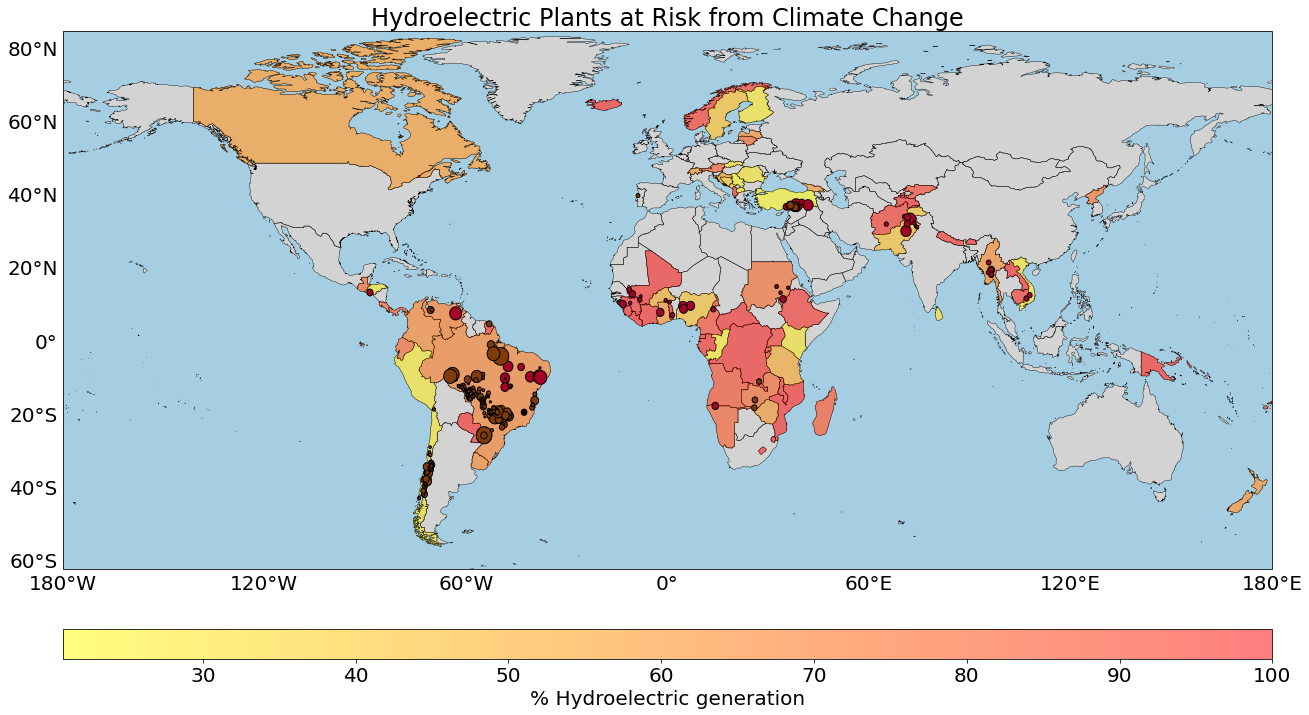

In [8]:
# Sitios afectados por cambio climático

# Umbral de % de generación por país
tr = 20
f = borders.loc[ c[ c["estimated_generation_gwh_2017"] >= tr ].index ]
f["% Hydroelectric generation"] = c["estimated_generation_gwh_2017"]

# Mapa

# Países con generación hidroeléctrica
c_hydro = gv.Polygons( f, vdims = "% Hydroelectric generation"
    ).opts( linewidth = 0.4, cmap = "autumn_r", alpha = 0.5, **options )
df["geometry"] = df["point"].buffer( ( df["capacity_mw"] / 250 ) ** (1/4) )

# Sitios afectados
df["i"] = 1
drought = df[ df.index.isin(d.index)
    & df["Drought Hotspots, 2040-2059, SSP2-4.5"]
    & (df["Country % hydro estimated_generation_gwh_2017"]>=tr) ]
map_1 = gv.Polygons( drought, vdims = "i" ).options(cmap = "PuOr")
#rain = df[ df.index.isin(d.index)
#    & df["Extreme rainfall Hotspots, 2040-2059, SSP2-4.5"]
#    & (df["Country % hydro estimated_generation_gwh_2017"]>=tr) ]
#map_2 = gv.Polygons( rain, vdims = "i" ).options(cmap = "autumn_r")
heat = df[ df.index.isin(d.index)
    & df["Extreme temperature Hotspots, 2040-2059, SSP2-4.5"]
    & (df["Country % hydro estimated_generation_gwh_2017"]>=tr) ]
map_3 = gv.Polygons( heat, vdims = "i" ).options(cmap = "RdYlBu")
map = ( ocean * countries * c_hydro * map_3 #* map_2
    * map_1 ).opts( show_legend = True,
    title = "Hydroelectric Plants at Risk from Climate Change", **options_m )
gv.output( map, size = 600 )

# Wind & Solar

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I      :Path   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]   (i)
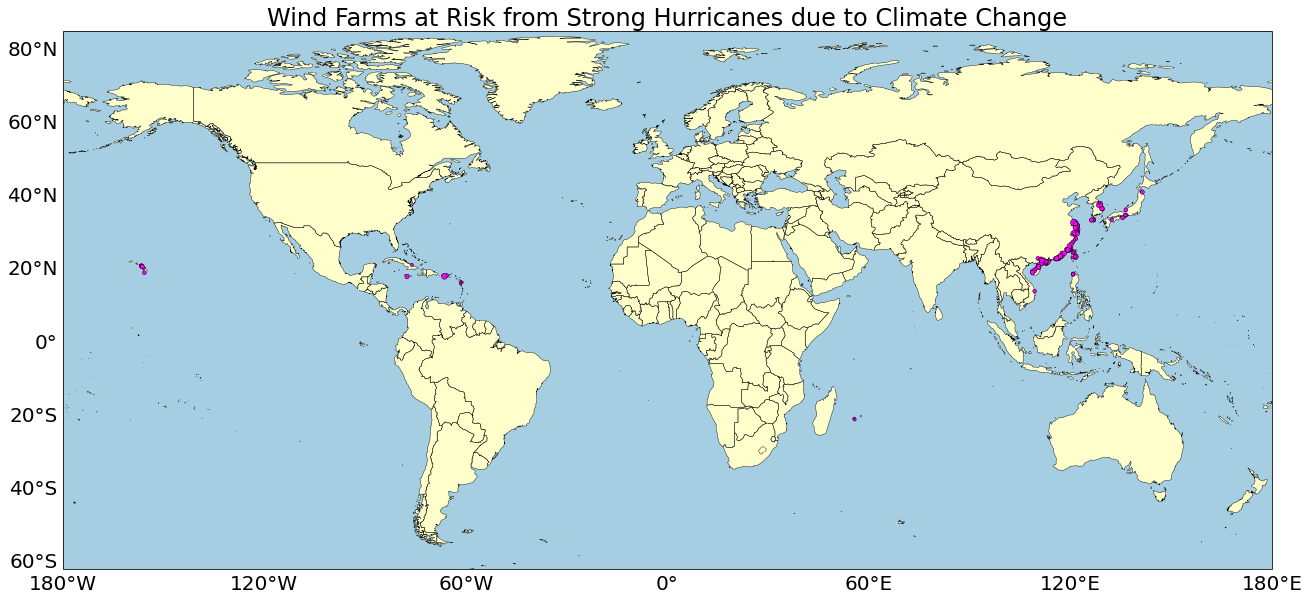

In [9]:
# Granjas eólicas

# Sitios afectados por cambio climático
wind = df[ (df["primary_fuel"]=="Wind")
    & df["Hurricane Hotspots, 2040-2059, SSP2-4.5"] ].copy()

# Mapa

# Sitios afectados
wind["i"] = 1
map_wind = gv.Polygons( wind, vdims = "i"
    ).options(cmap = "cool_r", linewidth = 0.5)
map = ( ocean * countries * map_wind ).opts( show_legend = True,
    title = "Wind Farms at Risk from Strong Hurricanes due to Climate Change",
    **options_m_2 )
gv.output( map, size = 600 )

:Overlay
   .Polygons.I   :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I       :Path   [Longitude,Latitude]
   .Polygons.II  :Polygons   [Longitude,Latitude]   (i)
   .Polygons.III :Polygons   [Longitude,Latitude]   (i)
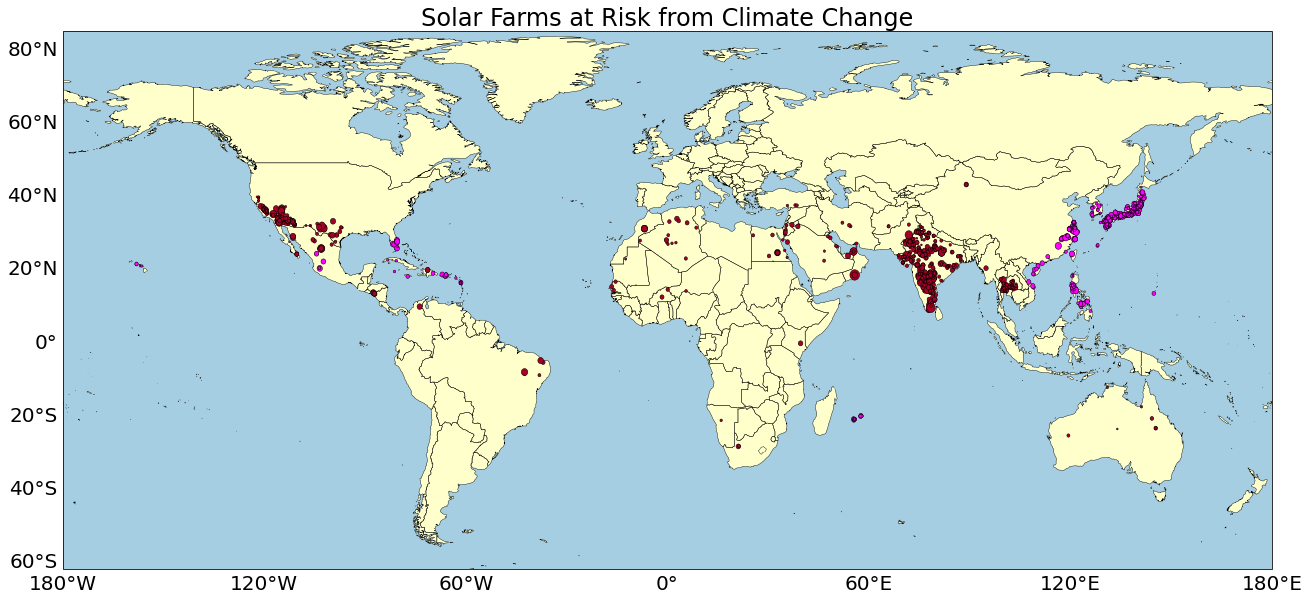

In [10]:
# Granjas solares

# Sitios afectados por cambio climático
solar = df[ df["primary_fuel"] == "Solar" ].copy()

# Mapa

# Sitios afectados
solar["i"] = 1
heat = df[ df.index.isin(solar.index)
    & df["Extreme temperature Hotspots, 2040-2059, SSP2-4.5"] ]
map_3 = gv.Polygons( heat, vdims = "i"
    ).options(cmap = "RdYlBu", linewidth = 0.5)
hurr = df[ df.index.isin(solar.index)
    & df["Hurricane Hotspots, 2040-2059, SSP2-4.5"] ]
map_4 = gv.Polygons( hurr, vdims = "i"
    ).options(cmap = "cool_r", linewidth = 0.5)
map = ( ocean * countries * map_4 * map_3 ).opts( show_legend = True,
    title = "Solar Farms at Risk from Climate Change", **options_m_2 )
gv.output( map, size = 600 )

# Refineries

In [11]:
# Refineries data

# Estados Unidos
id = "US_Refineries_Capacity_ProductType"
# Cargamos el archivo
df_3 = pd.read_excel( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0] )
df_3 = df_3.rename( columns =
    {"Latitude": "latitude", "Longitude": "longitude"} )
# Creamos un punto con las coordenadas.
df_3["point"] = gpd.points_from_xy(df_3["longitude"], df_3["latitude"])
# Creamos un GeoDataFrame.
df_3 = gpd.GeoDataFrame(df_3, geometry = "point", crs = 4326)
df_3["geometry"] = df_3.buffer(1)
df_3 = df_3.set_geometry("geometry")

# Internacional
# World Heritage List
id = "International_Refineries_Capacity"
# Cargamos el archivo
df_2 = pd.read_excel( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], index_col = "FID"
    ).sort_index()
df_2 = df_2.rename( columns =
    {"Latitude": "latitude", "Longitude": "longitude"} )
# Creamos un punto con las coordenadas.
df_2["point"] = gpd.points_from_xy(df_2["longitude"], df_2["latitude"])
# Creamos un GeoDataFrame.
df_2 = gpd.GeoDataFrame(df_2, geometry = "point", crs = 4326)
df_2["geometry"] = df_2.buffer(1)
df_2 = df_2.set_geometry("geometry")

/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_20743/2457612194.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_3["geometry"] = df_3.buffer(1)
/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_20743/2457612194.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_2["geometry"] = df_2.buffer(1)


In [12]:
# Asignamos a cada sitio el valor que le corresponde a su coordenada

id = [ "US_Refineries_Capacity_ProductType",
    "International_Refineries_Capacity" ]

# Datos climáticos
c_path = "../share/Climate/"
c_files = os.listdir(c_path)
categories = [ "Drought", "Extreme_temperature",
    "Extreme_rainfall", "Hurricane" ]
cat_var   = []
cat_col_h = []
cat_col_f = []

# Iteramos para cada categoría climática
for cat in categories:
    # Cargamos archivos climáticos históricos y futuros
    with xr.open_dataset(c_path + f"{cat}_1995_2014.nc") as ds_h:
        with xr.open_dataset(c_path + f"{cat}_2040_2059_SSP245.nc") as ds_f:
            vars = list(ds_h.variables)
            vars.remove("lat")
            vars.remove("lon")
            cat_var.append(vars)

            # Agregamos los nombres de las columnas
            cols_h = ( [ f"{vars[0]}, 1995-2014, historical" ]
                + [ f"{cat.replace("_", " ")} {x}, 1995-2014, historical"
                for x in vars[1:] ] )
            cols_f = ( [ f"{vars[0]}, 2040-2059, SSP2-4.5" ]
                + [ f"{cat.replace("_", " ")} {x}, 2040-2059, SSP2-4.5"
                for x in vars[1:] ] )
            
            cat_col_h.append(cols_h)
            cat_col_f.append(cols_f)

            for j, df_i in enumerate([df_2, df_3]):

                df_i[cols_h] = None
                df_i[cols_f] = None

                # Iteramos para cada coordenada y asignamos los valores
                for row in df_i.itertuples():
                    vals_h = ds_h.sel( lat = row.latitude,
                        lon = row.longitude, method = "nearest" )
                    vals_f = ds_f.sel( lat = row.latitude,
                        lon = row.longitude, method = "nearest" )
                    # Determinamos si el sitio está afectado o no
                    for i in range(0, len(cols_h)):
                        if i == 1:
                            df_i.loc[row.Index, cols_h[i]] = bool(
                                vals_h[vars[i]].values + 0)
                            df_i.loc[row.Index, cols_f[i]] = bool(
                                vals_f[vars[i]].values + 0)
                        else:
                            df_i.loc[row.Index, cols_h[i]] = (
                                vals_h[vars[i]].values + 0 )
                            df_i.loc[row.Index, cols_f[i]] = (
                                vals_f[vars[i]].values + 0 )
                            
                        df_i.drop( columns = ["geometry", "point"]
                            ).to_csv(f"../share/Indexes/{id[j]}_climate.csv")

/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_20743/2559566165.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  oil["geometry"] = oil["point"].buffer( ( oil["Capacity"] / 2e5 ) ** (1/4) )


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I      :Path   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]   (i)
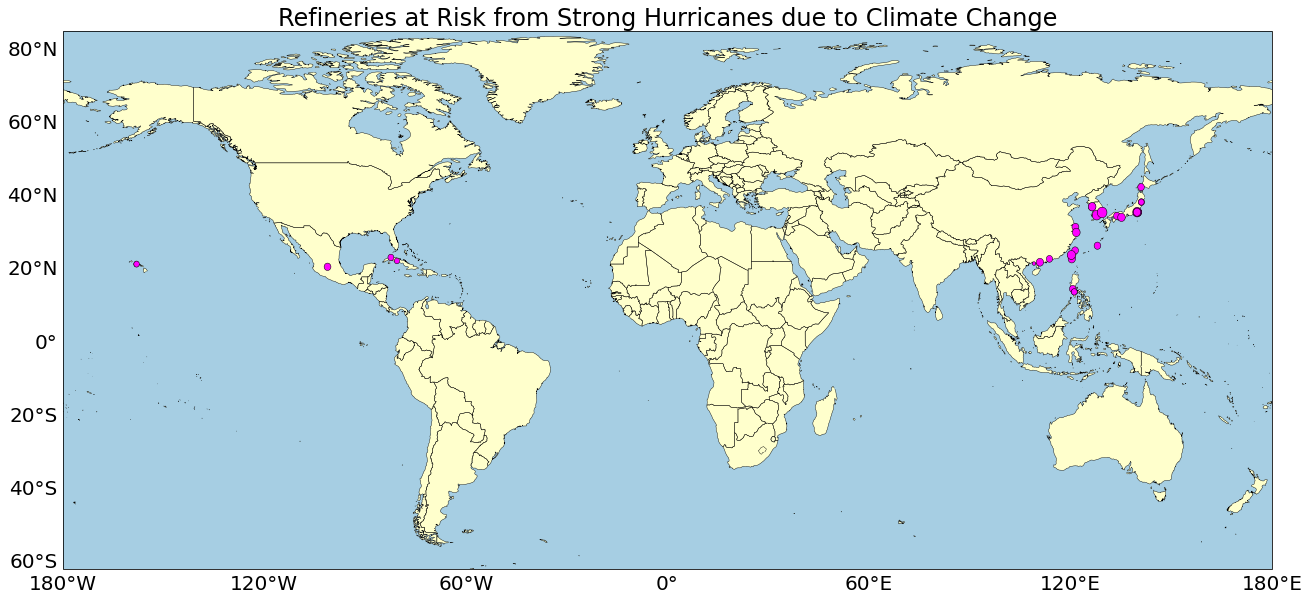

In [13]:
# Sitios afectados por cambio climático

# Unimos las dos tablas
oil_2 = df_2.loc[ #~df_2[cat_col_h[3][1]] &
    df_2[cat_col_f[3][1]], ["Capacity_B", "geometry", "point"]
    ].rename(columns = {"Capacity_B": "Capacity"})
oil_3 = df_3.loc[ #~df_3[cat_col_h[3][1]] &
    df_3[cat_col_f[3][1]], ["Capacity", "geometry", "point"] ]
oil = pd.concat([oil_2, oil_3])


# Mapa

# Sitios afectados
oil["geometry"] = oil["point"].buffer( ( oil["Capacity"] / 2e5 ) ** (1/4) )
oil["i"] = 1
map_oil = gv.Polygons( oil, vdims = "i"
    ).options(cmap = "cool_r", linewidth = 0.5)
map = ( ocean * countries * map_oil ).opts( show_legend = True,
    title = "Refineries at Risk from Strong Hurricanes due to Climate Change",
    **options_m_2 )
gv.output( map, size = 600 )